In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.Seq import Seq
from Bio.SeqUtils import ProtParam

In [11]:
# Load the dataset
df = pd.read_csv("Protein_Data.tsv", sep="\t")

# Display the first few rows
print("=== First 5 Rows of the Dataset ===")
print(df.head().to_string(index=False))
print("===================================")

# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")
print("===================================")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
print("===================================")

# Assuming 'Keywords' contains kinase information, display its distribution
print("\nDistribution of 'Keywords':")
print(df['Keywords'].value_counts())

=== First 5 Rows of the Dataset ===
 Entry                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Sequence                

In [19]:
# Create a binary target column 'is_kinase'
df['is_kinase'] = df['Keywords'].apply(lambda x: 1 if 'kinase' in str(x) else 0)

# Check the distribution of the target variable
print("=== Target Variable Distribution ===")
dist = df['is_kinase'].value_counts()
for value, count in dist.items():
    print(f"Class {value}: {count:>2} occurrences")
print("===================================")

=== Target Variable Distribution ===
Class 0: 542 occurrences
Class 1: 277 occurrences


In [20]:
# Function to compute k-mer frequencies
def compute_kmer_frequencies(sequence, k=3):
    seq = Seq(sequence)
    kmers = [str(seq[i:i+k]) for i in range(len(seq) - k + 1)]
    unique_kmers = set(kmers)
    frequencies = {kmer: kmers.count(kmer) / len(kmers) for kmer in unique_kmers}
    return frequencies

# Apply the function to each sequence
df['kmer_frequencies'] = df['Sequence'].apply(compute_kmer_frequencies)

# Create a set of all unique 3-mers across the dataset
all_kmers = set()
for freq_dict in df['kmer_frequencies']:
    all_kmers.update(freq_dict.keys())

# Create a feature matrix
feature_matrix = np.zeros((len(df), len(all_kmers)))
for i, freq_dict in enumerate(df['kmer_frequencies']):
    for j, kmer in enumerate(all_kmers):
        feature_matrix[i, j] = freq_dict.get(kmer, 0)

# Convert the feature matrix to a DataFrame
feature_df = pd.DataFrame(feature_matrix, columns=list(all_kmers))

print(f"\nFeature matrix shape: {feature_df.shape}")
print("First 5 rows of the feature matrix:")
print(feature_df.head())


Feature matrix shape: (819, 7997)
First 5 rows of the feature matrix:
   NMM       AQS  HVC  NWG  PTW       MAH  MPQ       VSK  YRR  WAN  ...  HWI  \
0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.003185  0.0  0.0  ...  0.0   
1  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...  0.0   
2  0.0  0.001152  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...  0.0   
3  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...  0.0   
4  0.0  0.000000  0.0  0.0  0.0  0.002358  0.0  0.000000  0.0  0.0  ...  0.0   

   AVY       SKS  SNH       SHL       PYL  KQK       RSR  TSV       PGA  
0  0.0  0.000000  0.0  0.003185  0.003185  0.0  0.000000  0.0  0.000000  
1  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000  
2  0.0  0.000000  0.0  0.001152  0.000000  0.0  0.002304  0.0  0.002304  
3  0.0  0.001065  0.0  0.001065  0.000000  0.0  0.000000  0.0  0.000000  
4  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000  

[5 

In [21]:
# Define features (X) and target (y)
X = feature_df
y = df['is_kinase']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (655, 7997)
Testing set shape: (164, 7997)


In [22]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


=== Model Evaluation Metrics ===
Accuracy:  0.95
Precision: 1.00
Recall:    0.84
F1-score:  0.91
AUC Score: 1.00


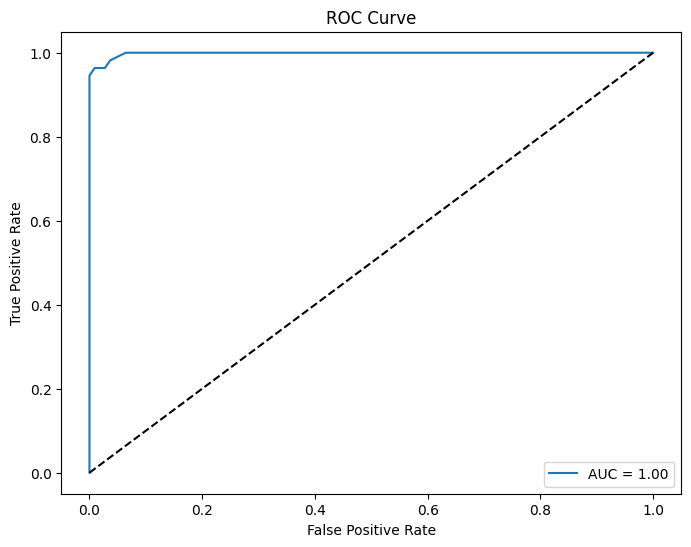

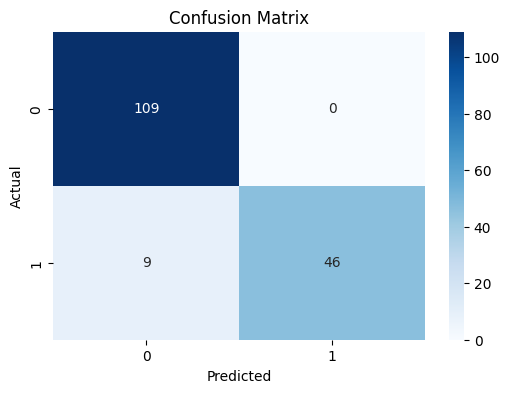

In [23]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_model, X_test, and y_test are already defined from training
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Display metrics in a formatted manner
print("=== Model Evaluation Metrics ===")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")
print(f"AUC Score: {auc:.2f}")
print("=================================")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

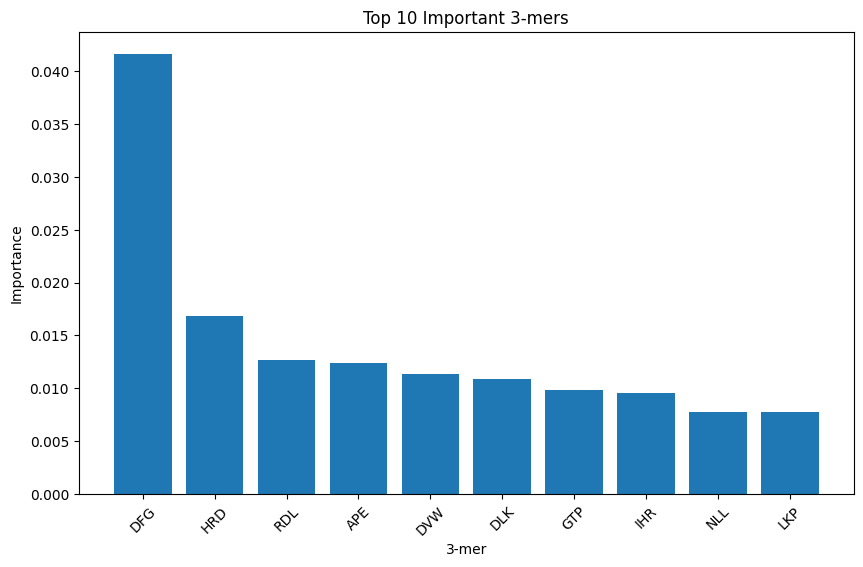

In [24]:
# Get feature importances from the model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important 3-mers")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [list(all_kmers)[i] for i in indices[:10]], rotation=45)
plt.xlabel("3-mer")
plt.ylabel("Importance")
plt.show()

In [28]:
# Function to predict kinase activity with a neat output
def predict_kinase(sequence, model, all_kmers):
    # Compute 3-mer frequencies (assuming compute_kmer_frequencies is defined)
    freq_dict = compute_kmer_frequencies(sequence)
    
    # Create feature vector
    feature_vector = np.zeros(len(all_kmers))
    for i, kmer in enumerate(all_kmers):
        feature_vector[i] = freq_dict.get(kmer, 0)
    
    # Reshape for prediction
    feature_vector = feature_vector.reshape(1, -1)
    
    # Make prediction
    prediction = model.predict(feature_vector)[0]
    probability = model.predict_proba(feature_vector)[0][1]
    
    # Display formatted output
    print("===")
    print("Prediction Results")
    print("===")
    print(f"Input Sequence: {sequence[:20]}...")  # Show first 20 characters
    print(f"Predicted Class: {'Kinase' if prediction == 1 else 'Not Kinase'}")
    print(f"Probability of being a kinase: {probability:.2f}")
    if prediction == 1:
        print("Based on the model, this sequence is likely to be a kinase.")
    else:
        print("Based on the model, this sequence is unlikely to be a kinase.")
    print("===")
    
    return prediction, probability

# Example usage
new_sequence = "MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACKHPEVQSILKISQPQEPELMNANPSPPPSPSQQINLGPSSNPHAKPSDFHFLKVIGKGSFGKVLLARHKAEEVFYAVKVLQKKAILKKKEEKHIMSERNVLLKNVKHPFLVGLHFSFQTADKLYFVLDYINGGELFYHLQRERCFLEPRARFYAAEIASALGYLHSLNIVYRDLKPENILLDSQGHIVLTDFGLCKENIEHNSTTSTFCGTPEYLAPEVLHKQPYDRTVDWWCLGAVLYEMLYGLPPFYSRNTAEMYDNILNKPLQLKPNITNSARHLLEGLLQKDRTKRLGAKDDFMEIKSHVFFSLINWDDLINKKITPPFNPNVSGPNDLRHFDPEFTEEPVPNSIGKSPDSVLVTASVKEAAEAFLGFSYAPPTDSFL"
predict_kinase(new_sequence, rf_model, all_kmers)


===
Prediction Results
===
Input Sequence: MTVKTEAAKGTLTYSRMRGM...
Predicted Class: Kinase
Probability of being a kinase: 0.89
Based on the model, this sequence is likely to be a kinase.
===


C:\Users\devpa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\devpa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(np.int64(1), np.float64(0.89))

In [32]:
import joblib
joblib.dump(rf_model, 'kinase_model.pkl')
joblib.dump(list(all_kmers), 'all_kmers.pkl')

['all_kmers.pkl']